In [ ]:
!pip install pmdarima

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pylab
matplotlib.rcParams["figure.figsize"]=(20,10)
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
import warnings
warnings.filterwarnings("ignore")
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [23]:
df1=pd.read_csv("iaq_middle5.csv", encoding="utf-8").copy()
df1.head()

,Time,Temp,Pressure,Humidnity,IAQ
0,14/10/2023 20:04,33.70,100176,66.24,89.06
1,14/10/2023 20:05,33.71,100177,66.11,89.11
2,14/10/2023 20:06,33.86,100180,65.20,89.51
3,14/10/2023 20:07,34.22,100181,64.18,89.94
4,14/10/2023 20:08,34.82,100182,62.90,90.36


In [24]:
df1=df1.loc[1:]
df1.head()

,Time,Temp,Pressure,Humidnity,IAQ
1,14/10/2023 20:05,33.71,100177,66.11,89.11
2,14/10/2023 20:06,33.86,100180,65.20,89.51
3,14/10/2023 20:07,34.22,100181,64.18,89.94
4,14/10/2023 20:08,34.82,100182,62.90,90.36
5,14/10/2023 20:09,34.91,100183,62.28,90.74


In [25]:
df1.Time=pd.to_datetime(df1.Time,dayfirst="True")
df1.set_index("Time",inplace=True)
df1.asfreq('h')
df1.head()

,Temp,Pressure,Humidnity,IAQ
Time,,,,
2023-10-14 20:05:00,33.71,100177,66.11,89.11
2023-10-14 20:06:00,33.86,100180,65.20,89.51
2023-10-14 20:07:00,34.22,100181,64.18,89.94
2023-10-14 20:08:00,34.82,100182,62.90,90.36
2023-10-14 20:09:00,34.91,100183,62.28,90.74


In [26]:
print(df1.isnull().sum)
print(df1.shape)
print(df1.dtypes)

<bound method NDFrame._add_numeric_operations.<locals>.sum of                       Temp  Pressure  Humidnity    IAQ
Time                                                  
2023-10-14 20:05:00  False     False      False  False
2023-10-14 20:06:00  False     False      False  False
2023-10-14 20:07:00  False     False      False  False
2023-10-14 20:08:00  False     False      False  False
2023-10-14 20:09:00  False     False      False  False
...                    ...       ...        ...    ...
2023-10-15 19:22:00  False     False      False  False
2023-10-15 19:23:00  False     False      False  False
2023-10-15 19:24:00  False     False      False  False
2023-10-15 19:25:00  False     False      False  False
2023-10-15 19:26:00  False     False      False  False

[1402 rows x 4 columns]>
(1402, 4)
Temp         float64
Pressure       int64
Humidnity    float64
IAQ          float64
dtype: object


In [27]:
df1.describe()

,Temp,Pressure,Humidnity,IAQ
count,1402.000000,1402.000000,1402.000000,1402.000000
mean,35.791541,100215.238231,56.971683,92.931591
std,0.747057,128.415080,2.739876,1.141129
min,33.650000,99917.000000,47.780000,89.110000
25%,35.320000,100168.000000,55.082500,92.180000
50%,35.850000,100214.000000,57.730000,92.610000
75%,36.320000,100320.000000,58.777500,93.730000
max,37.600000,100427.000000,66.110000,96.800000


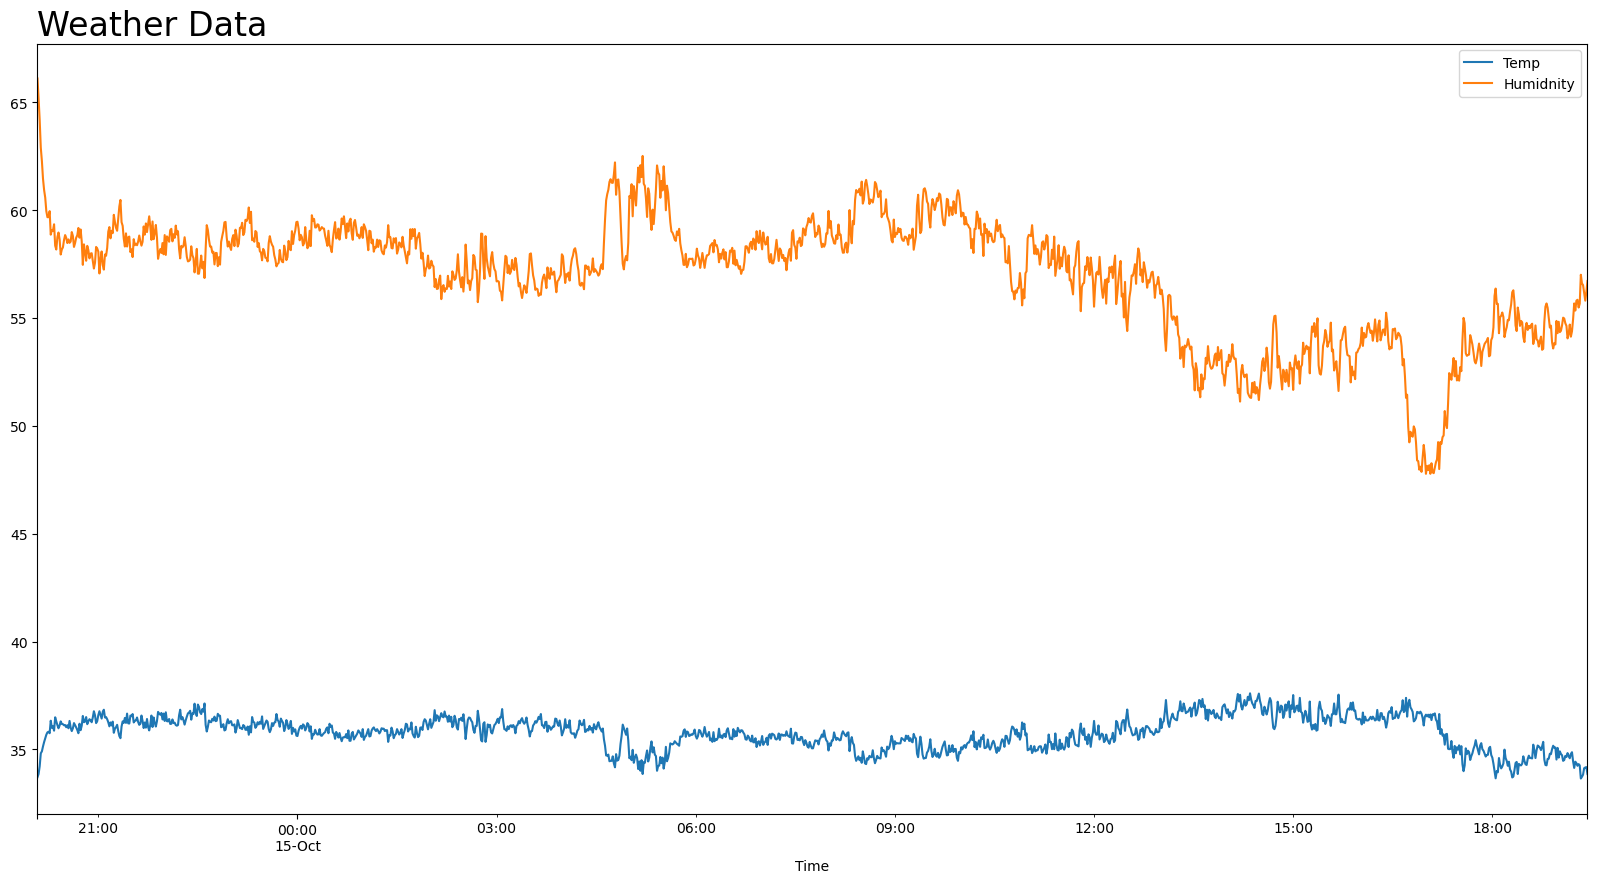

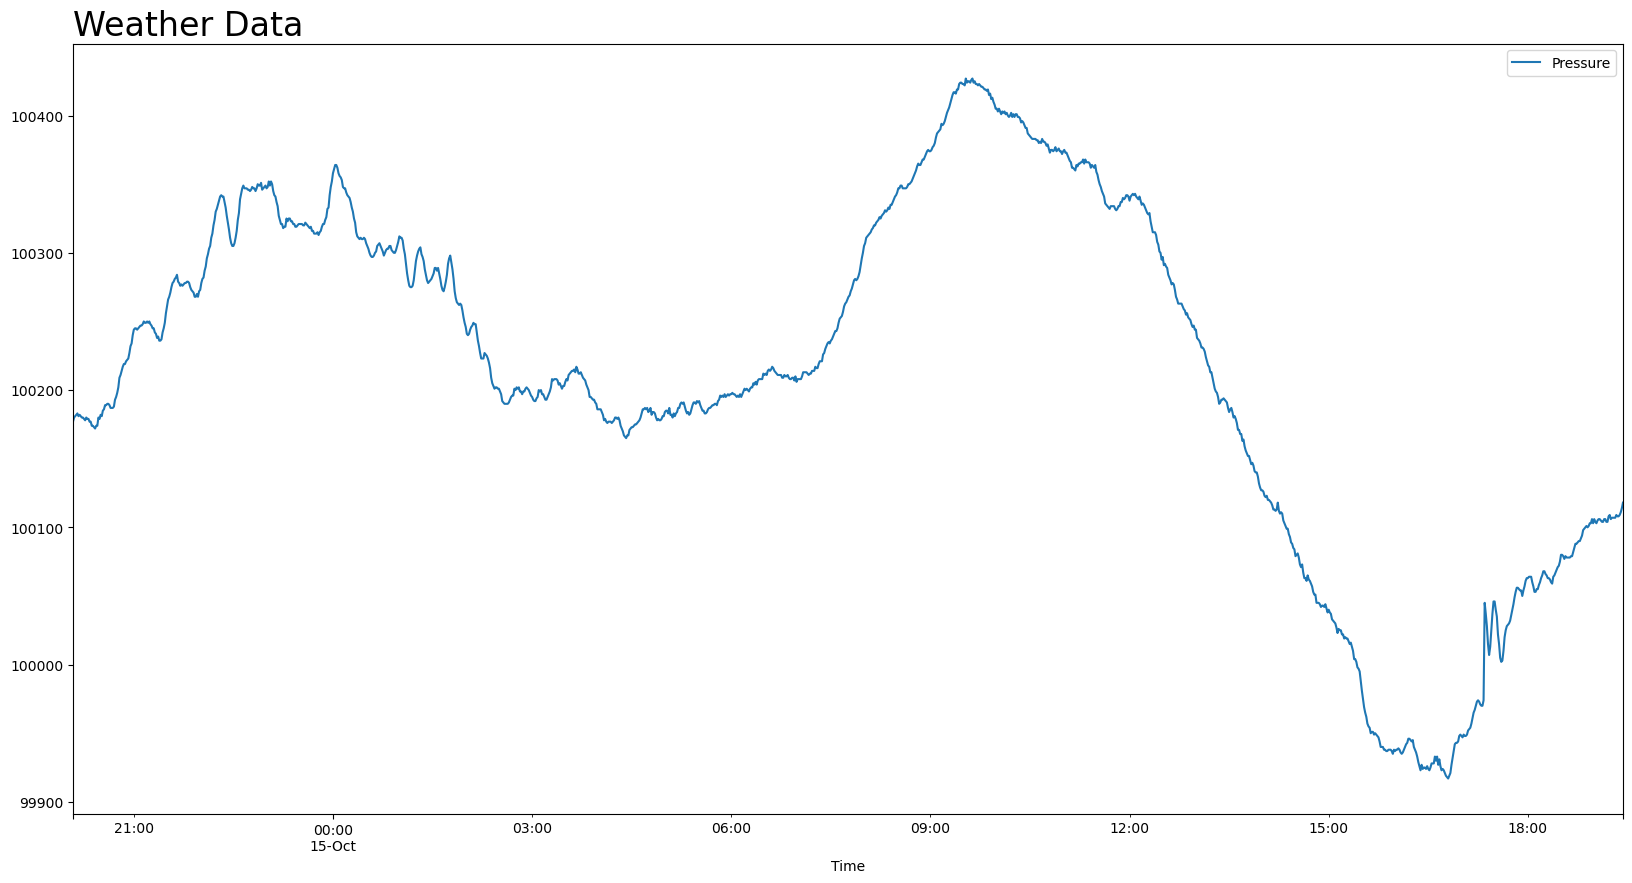

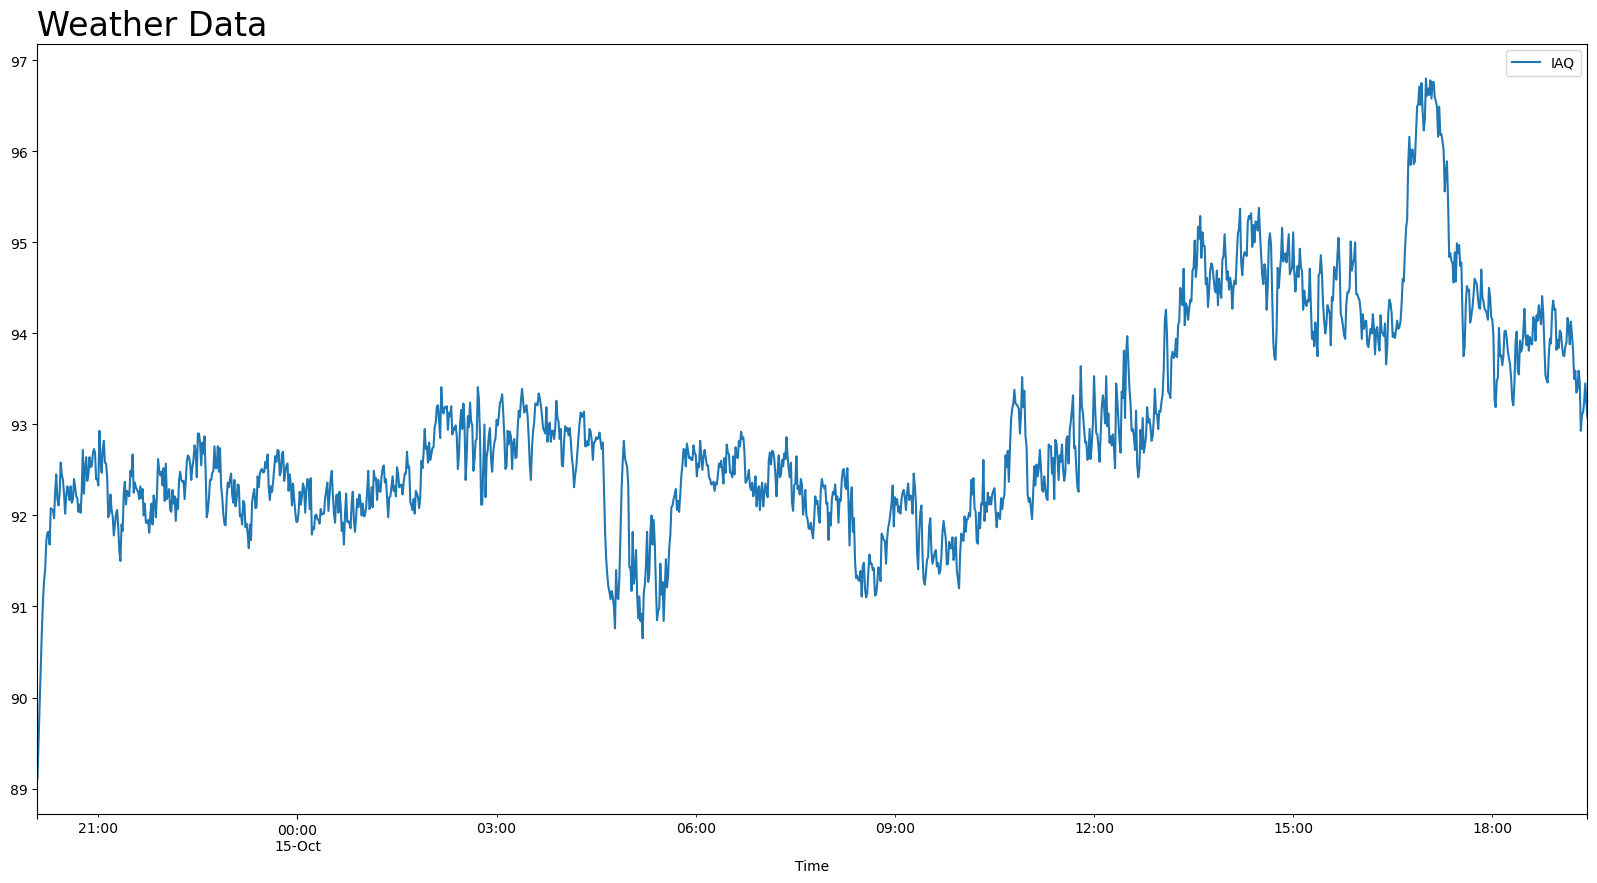

In [28]:
df1["Temp"].plot()
df1.Humidnity.plot()
plt.title("Weather Data",size=24,loc="left")
plt.legend(["Temp","Humidnity"])
plt.show()

df1.Pressure.plot()
plt.title("Weather Data",size=24,loc="left")
plt.legend(["Pressure"])
plt.show()

df1.IAQ.plot()
plt.title("Weather Data",size=24,loc="left")
plt.legend(["IAQ"])
plt.show()

In [29]:
df1.tail()

,Temp,Pressure,Humidnity,IAQ
Time,,,,
2023-10-15 19:22:00,33.83,100108,56.53,93.13
2023-10-15 19:23:00,34.13,100109,56.16,93.25
2023-10-15 19:24:00,34.16,100111,55.81,93.45
2023-10-15 19:25:00,34.18,100114,56.22,93.24
2023-10-15 19:26:00,33.86,100118,56.72,93.07


In [30]:
sts.adfuller(df1.IAQ)

(-2.9103195744574246,
 0.04416106446425883,
 5,
 1396,
 {'1%': -3.435042954953382,
  '5%': -2.8636126027916173,
  '10%': -2.567873447118661},
 -191.0673676353258)

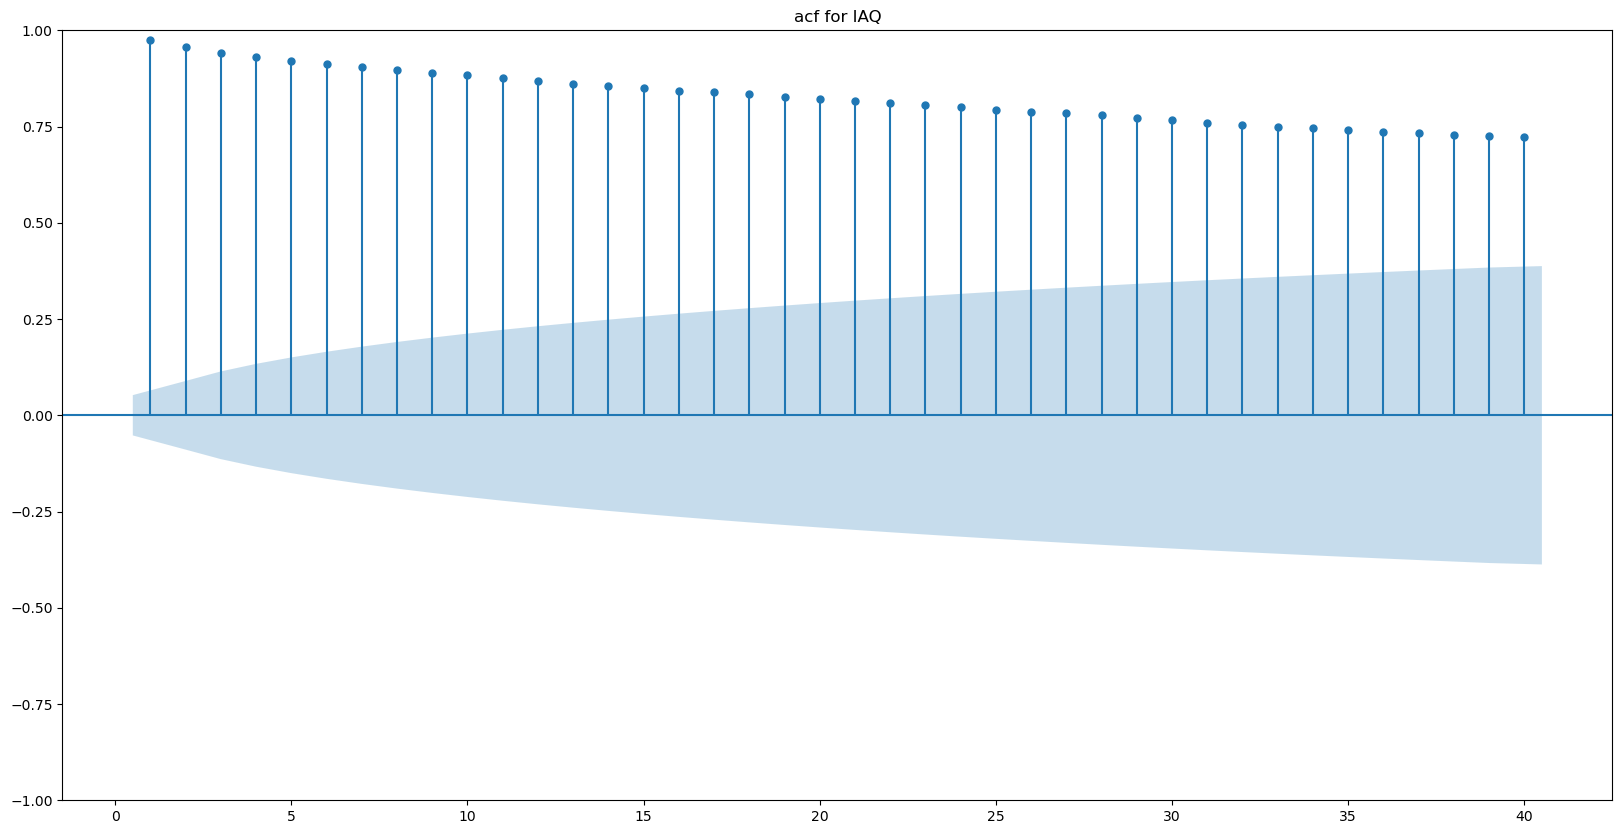

In [31]:
sgt.plot_acf(df1.IAQ,lags=40,zero=False)
plt.title("acf for IAQ")
plt.show()

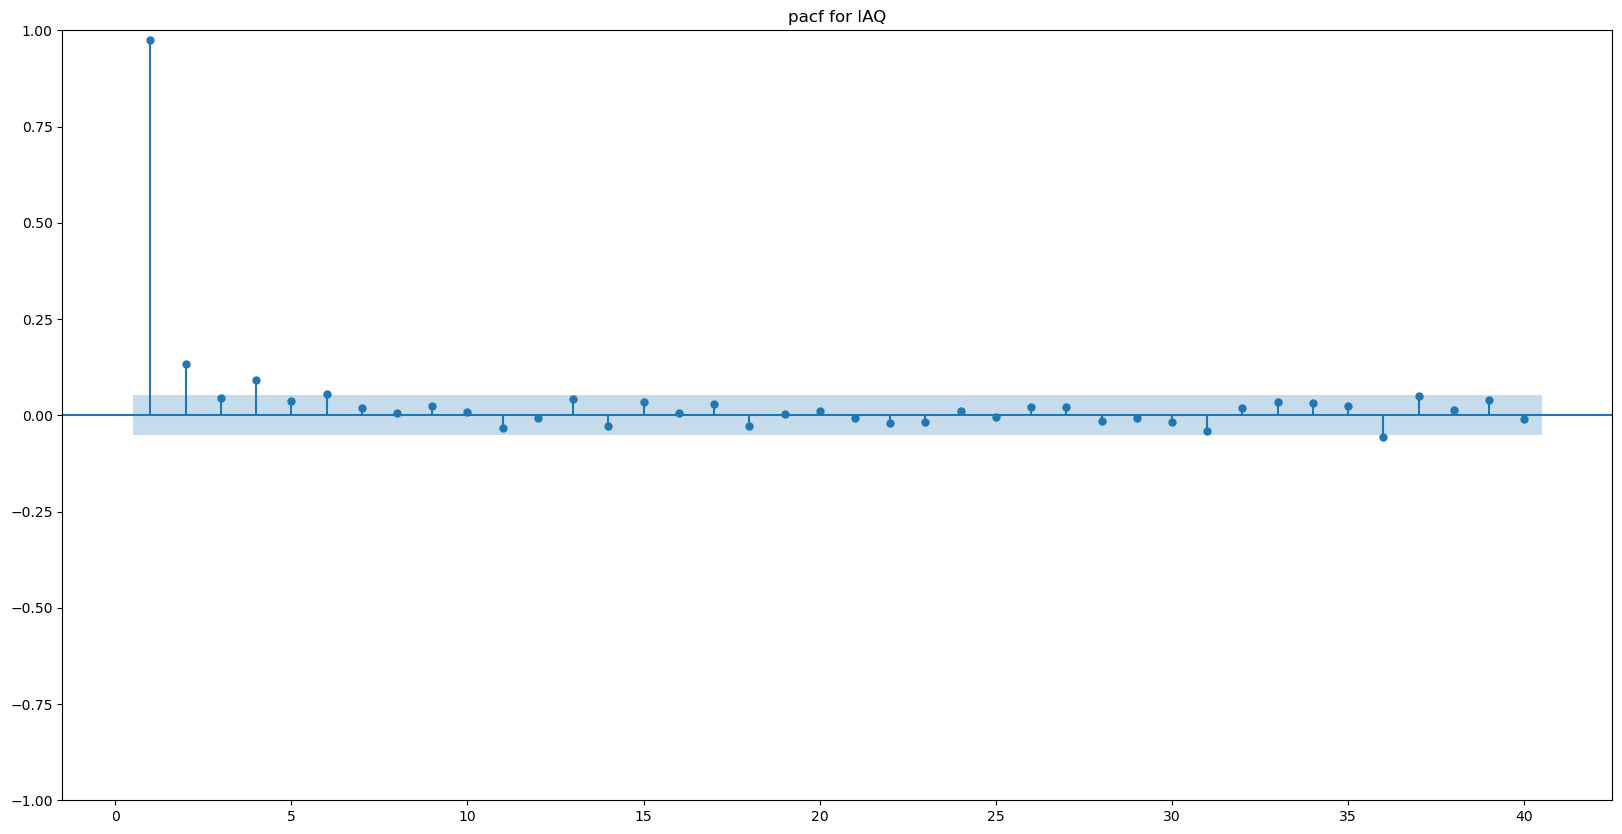

In [32]:
sgt.plot_pacf(df1.IAQ,lags=40,zero=False,method=("ols"))
plt.title("pacf for IAQ")
plt.show()

In [34]:
from statsmodels.tsa.api import VAR
df_ret=df1[["Temp","Pressure","Humidnity","IAQ"]][1:]
model_ret=VAR(df_ret)
model_ret.select_order(10)
result=model_ret.fit(ic='aic')
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 15, Oct, 2023
Time:                     21:34:08
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -10.0768
Nobs:                     1387.00    HQIC:                  -10.6155
Log likelihood:          -59.2051    FPE:                1.77845e-05
AIC:                     -10.9374    Det(Omega_mle):     1.51383e-05
--------------------------------------------------------------------
Results for equation Temp
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const               -44.943569        99.447937           -0.452           0.651
L1.Temp               0.917358         0.082952           11.059           0.000
L1.Pressure          -0.002035         0.002207           -0.

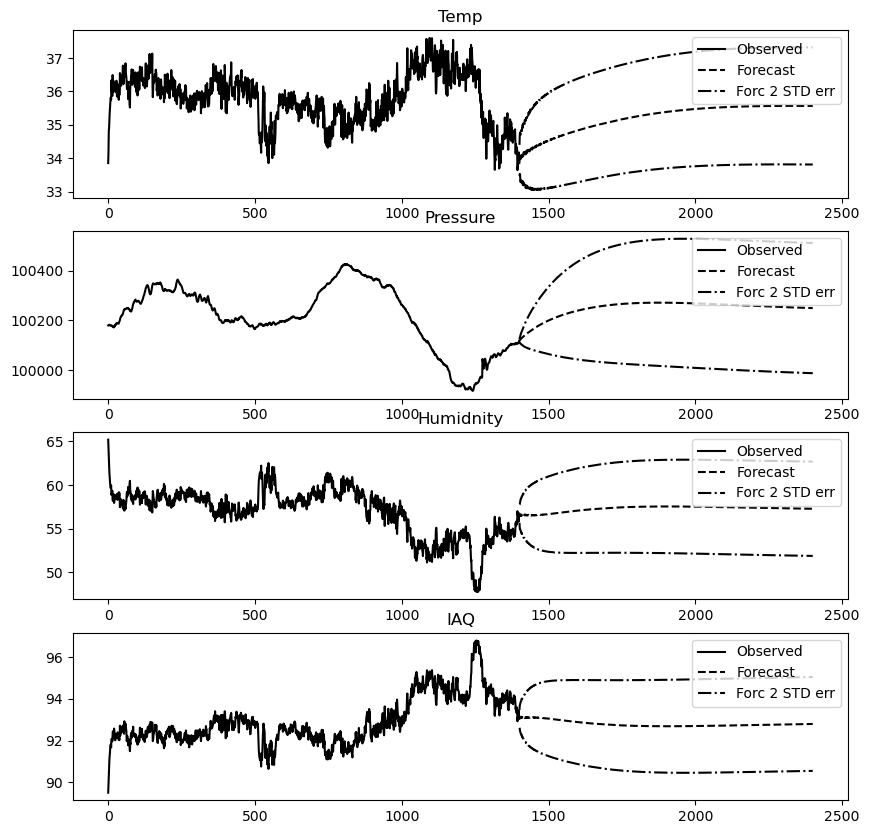

In [35]:
result.plot_forecast(1000)
plt.show()